# EDA part

In [22]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load in your csv.gz's of results for each year extracted
yr00 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)
yr00.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [24]:
# Load in your csv.gz's of results for each year extracted
yr01 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)
yr01.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1137.0,PG-13


In [25]:
# concatenate the dataframes pages
df_years = pd.concat([yr01, yr00],
                      ignore_index=True)

In [26]:
## Save current dataframe to file.
df_years.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [27]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2493 non-null   object 
 1   adult                  2491 non-null   float64
 2   backdrop_path          1290 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2491 non-null   float64
 5   genres                 2491 non-null   object 
 6   homepage               174 non-null    object 
 7   id                     2491 non-null   float64
 8   original_language      2491 non-null   object 
 9   original_title         2491 non-null   object 
 10  overview               2439 non-null   object 
 11  popularity             2491 non-null   float64
 12  poster_path            2197 non-null   object 
 13  production_companies   2491 non-null   object 
 14  production_countries   2491 non-null   object 
 15  rele

How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [28]:
budget_filter= df_years['budget']> 0
revenue_filter= df_years['revenue'] > 0

In [29]:
# Create a budget and revenue filters that have values greater than 0
df_years =df_years[(df_years['budget'] > 0) | (df_years['revenue'] > 0)]
df_years.info()
# Create a new dataframe for EDA
#df = df_years.loc[budget_filter & revenue_filter, :]
#df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 1 to 2491
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                619 non-null    object 
 1   adult                  619 non-null    float64
 2   backdrop_path          517 non-null    object 
 3   belongs_to_collection  102 non-null    object 
 4   budget                 619 non-null    float64
 5   genres                 619 non-null    object 
 6   homepage               80 non-null     object 
 7   id                     619 non-null    float64
 8   original_language      619 non-null    object 
 9   original_title         619 non-null    object 
 10  overview               616 non-null    object 
 11  popularity             619 non-null    float64
 12  poster_path            598 non-null    object 
 13  production_companies   619 non-null    object 
 14  production_countries   619 non-null    object 
 15  relea

616 total movies that have at least some valid financial information.

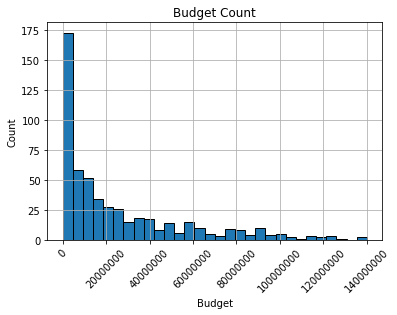

In [30]:
# Create a histogram for the count for budget for movies >0
df_years.loc[budget_filter, 'budget'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Budget")
plt.ylabel('Count');
plt.title('Budget Count');

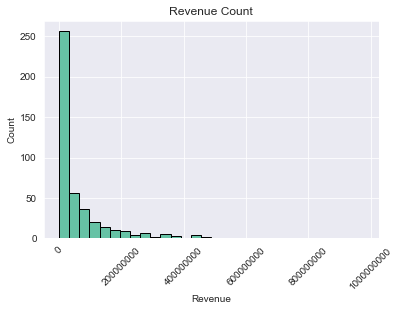

In [40]:
# Create a histogram for the count for revenue for movies >0
df_years.loc[revenue_filter, 'revenue'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Revenue")
plt.ylabel('Count')
plt.title('Revenue Count');

How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [34]:
df_years['certification'].value_counts()

R        227
PG-13    130
PG        35
NR        17
G         14
Name: certification, dtype: int64

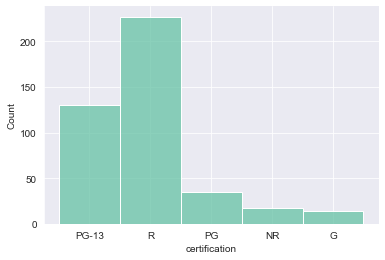

In [39]:
# Graph a histogram using seaborn
sns.histplot(data=df_years, x='certification', palette='Set2');
sns.despine()

What is the average revenue per certification category?

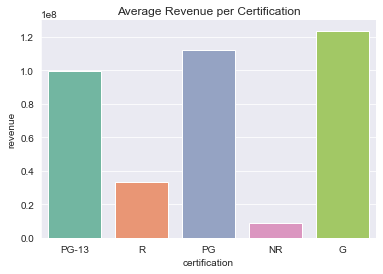

In [38]:
sns.barplot(data=df_years, x='certification',y='revenue', ci=None)
plt.title('Average Revenue per Certification')
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.despine()

What is the average budget per certification category?

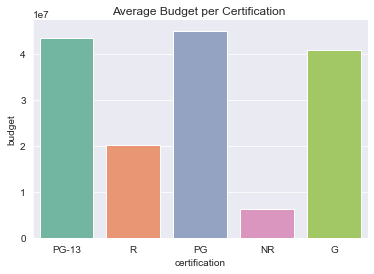

In [37]:
sns.barplot(data=df_years, x='certification',y='budget', ci=None)
plt.title('Average Budget per Certification ')
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.despine()